In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Input  # Правильный импорт слоя Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [14]:
# Чтение данных из Google Drive
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


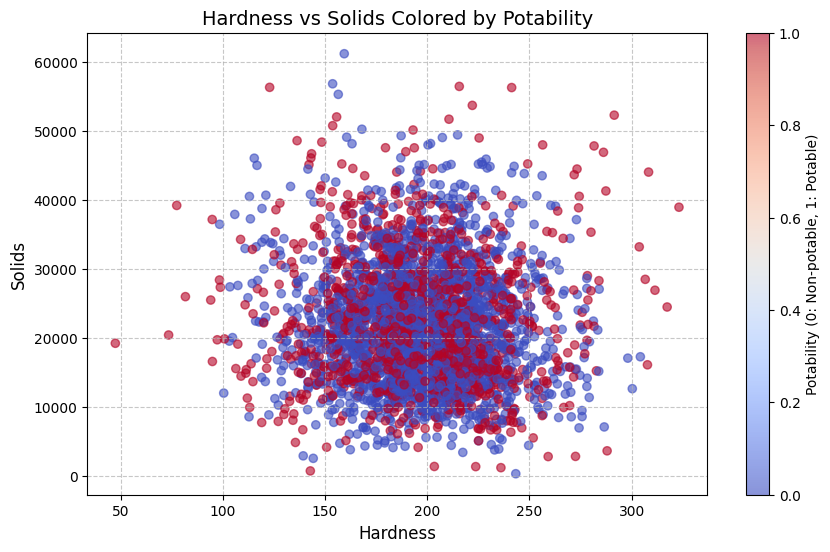

In [19]:
import matplotlib.pyplot as plt

# Visualization 3: Scatter Plot of Hardness vs Solids, Colored by Potability
plt.figure(figsize=(10, 6))
plt.scatter(Out[14]['Hardness'], Out[14]['Solids'], c=Out[14]['Potability'], cmap='coolwarm', alpha=0.6)
plt.title('Hardness vs Solids Colored by Potability', fontsize=14)
plt.xlabel('Hardness', fontsize=12)
plt.ylabel('Solids', fontsize=12)
plt.colorbar(label='Potability (0: Non-potable, 1: Potable)')
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [18]:
# Шаг 1: Разделение данных на признаки и целевую переменную
X = df.drop(columns='Potability')  # Все столбцы кроме целевого
y = df['Potability']  # Целевая переменная

# Шаг 2: Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Шаг 3: Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Шаг 4: Построение нейронной сети
model = Sequential()

# Добавляем слой Input
model.add(Input(shape=(X_train.shape[1],)))

# Добавляем полносвязные слои
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout для регуляризации
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Выходной слой для бинарной классификации
model.add(Dense(1, activation='sigmoid'))

# Шаг 5: Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Шаг 6: Обучение модели
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Шаг 7: Оценка модели
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4696 - loss: 0.7737 - val_accuracy: 0.5948 - val_loss: 0.6838
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5754 - loss: 0.6764 - val_accuracy: 0.5991 - val_loss: 0.6808
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5443 - loss: 0.7025 - val_accuracy: 0.5948 - val_loss: 0.6778
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6013 - loss: 0.6683 - val_accuracy: 0.5948 - val_loss: 0.6762
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6018 - loss: 0.6722 - val_accuracy: 0.5969 - val_loss: 0.6738
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5844 - loss: 0.6854 - val_accuracy: 0.5991 - val_loss: 0.6727
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5913 - loss: 0.6755 - val_accuracy: 0.6078 - val_loss: 0.6709
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5936 - loss: 0.6747 - val_accuracy: 0.6078 - val_loss

NameError: name 'Sequential' is not defined